In [1]:
%cd /content/drive/MyDrive/Colab\ Notebooks/데이터분석/Data

/content/drive/MyDrive/Colab Notebooks/데이터분석/Data


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
plt.rc('font', family='NanumBarunGothic')

In [5]:
df1 = pd.read_csv('Data03.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

# **단일변수**

**범주형**

In [6]:
df1['type_of_contract'].value_counts()

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

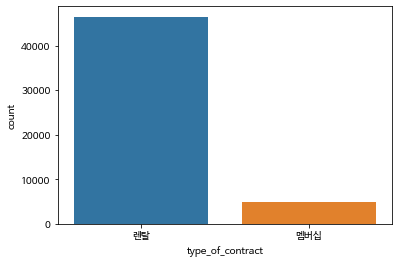

In [7]:
sns.countplot(data = df1, x = 'type_of_contract')

In [8]:
df1['product'].value_counts()

K1    39134
K2     8995
K3     2082
K5      645
K4      327
K6      120
Name: product, dtype: int64

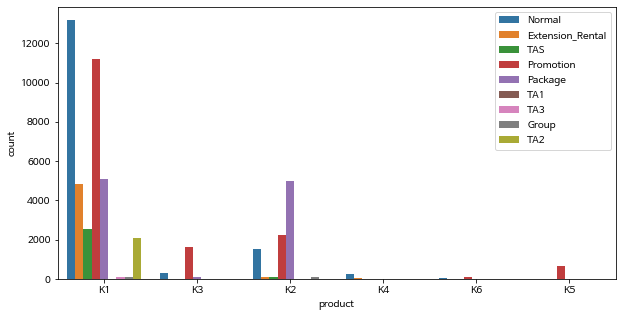

In [9]:
plt.figure(figsize = [10,5])
sns.countplot(data = df1, x = 'product', hue = 'type_of_contract2')
plt.legend(loc = 'upper right')
#plt.savefig('img1')

In [10]:
order = df1['bank'].value_counts().iloc[:5].index.tolist()

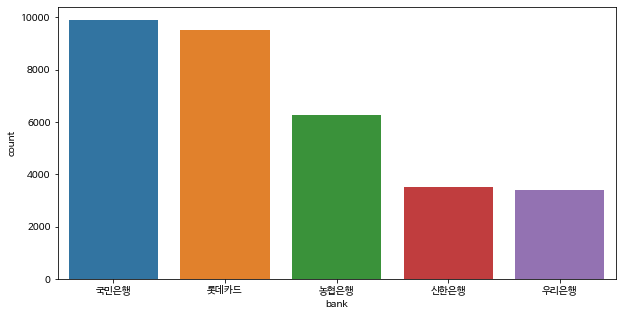

In [11]:
plt.figure(figsize = [10,5])
sns.countplot(data = df1, x='bank', order = order)

**연속형**

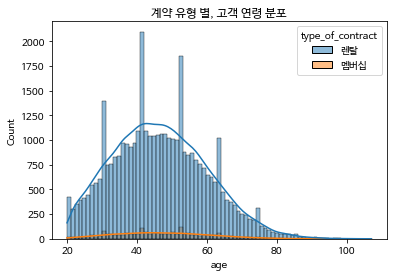

In [12]:
plt.title('계약 유형 별, 고객 연령 분포')
sns.histplot(data = df1, x = 'age', kde = True, hue = 'type_of_contract')

# **다변수**

X : 연속 / Y : 연속

산점도, 회귀선, 상관분석

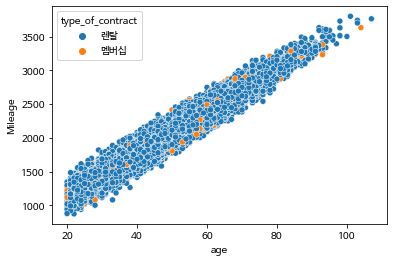

In [13]:
sns.scatterplot(data = df1, x = 'age', y = 'Mileage', hue = 'type_of_contract')

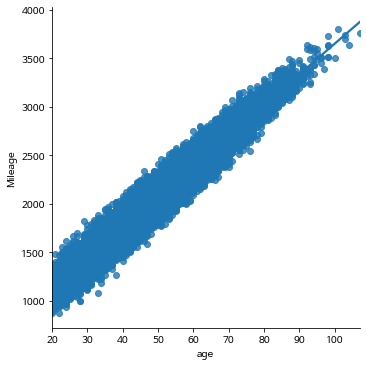

In [14]:
sns.lmplot(data = df1, x = 'age', y = 'Mileage')

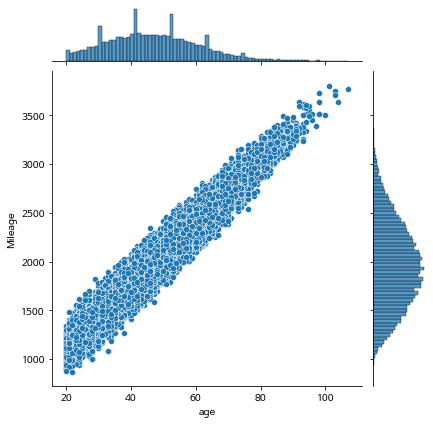

In [15]:
sns.jointplot(data = df1, x = 'age', y = 'Mileage')

In [16]:
df1.corr() # 상관관계를 먼저 확인 한 후 상관도가 있는 것을 pairplot

,id,Term,amount,overdue_count,credit rating,age,Mileage
id,1.000000,0.018640,-0.162013,-0.011126,0.010875,0.000030,-0.000965
Term,0.018640,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,-0.162013,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.011126,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,0.010875,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,0.000030,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.000965,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


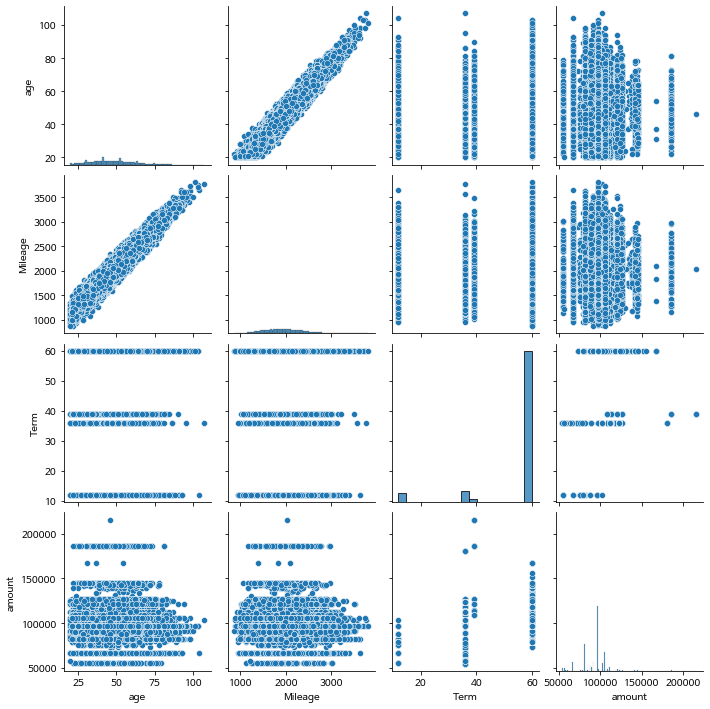

In [17]:
sns.pairplot(df1[['age', 'Mileage', 'Term', 'amount']]) # 연속형 변수 전체적으로 확인해 볼 수 있음

X : 범주 / Y : 연속

Barplot, Boxplot

In [18]:
df1['channel'].value_counts()

서비스 방문     15186
홈쇼핑/방송     12977
렌탈총판        5544
R관리방판       4727
하이마트        3227
영업방판        3039
렌탈재계약       2193
일반          1232
전자랜드        1205
R빌리미         560
이마트          265
홈플러스         225
R인터넷         198
R유통사         188
홈쇼핑/인터넷      177
R렌탈운영        120
R농협          119
R농협인터넷몰       83
R법인그룹         20
R법인           19
Name: channel, dtype: int64

In [19]:
p1 = pd.pivot_table(data = df1, index = 'channel', values = 'amount', aggfunc='sum')

In [20]:
p1.sort_values(by='amount', ascending = False).head(10)

,amount
channel,
서비스 방문,1496420760
홈쇼핑/방송,1156173900
렌탈총판,565189800
R관리방판,458556039
영업방판,322955100
하이마트,234002706
렌탈재계약,147318600
일반,124029000
전자랜드,118252200


In [21]:
top_list = p1.sort_values(by='amount', ascending = False).head(5).index.tolist()

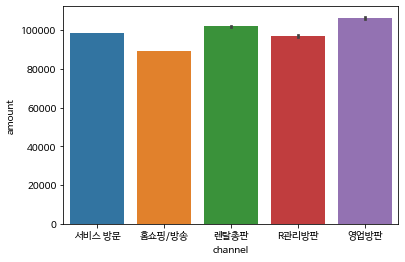

In [22]:
sns.barplot(data = df1, x = 'channel', y = 'amount', order = top_list) # 평균으로 계산됨

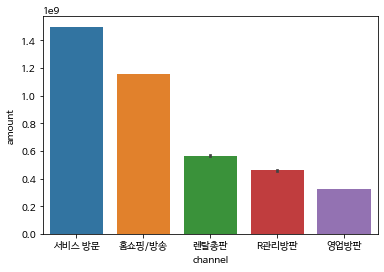

In [23]:
sns.barplot(data = df1, x = 'channel', y = 'amount', order = top_list, estimator=sum) # ci = None : 신뢰구간 제거

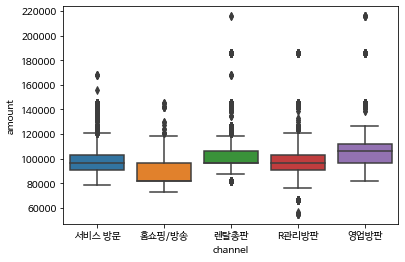

In [24]:
sns.boxplot(data = df1, x = 'channel', y = 'amount', order = top_list)
# 범위 : 신뢰구간 범위 밖 : 이상치

# **순서형 / 시간 데이터**

In [25]:
df1['datetime(timestamp)'] = pd.to_datetime(df1['datetime'])

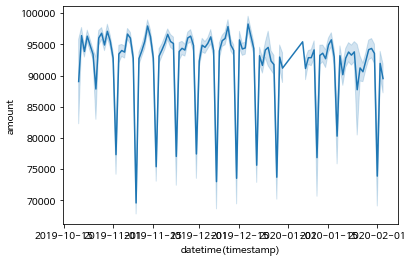

In [26]:
sns.lineplot(data = df1, x = 'datetime(timestamp)', y = 'amount') # 일자별로 평균값

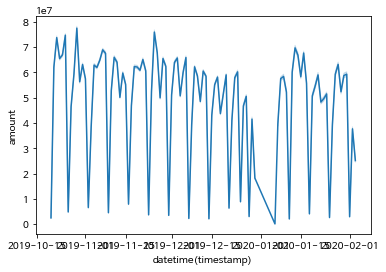

In [27]:
sns.lineplot(data = df1, x = 'datetime(timestamp)', y = 'amount', estimator=sum) # 일자별로 매출액

In [28]:
df1['계약요일'] = df1['datetime(timestamp)'].dt.day_name()

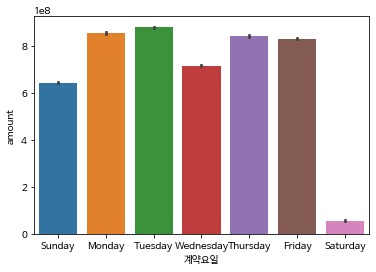

In [29]:
sns.barplot(data = df1, x = '계약요일', y = 'amount', estimator=sum) # 토요일은 계약 저조함
# lineplot에서 주기적으로 떨어지는 것은 토요일 때문

In [30]:
df1['계약주차'] = df1['datetime(timestamp)'].dt.week # 1년 = 52주를 번호매김

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


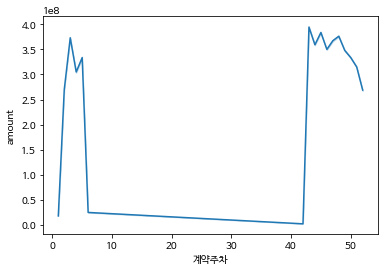

In [31]:
sns.lineplot(data = df1, x = '계약주차', y = 'amount', estimator=sum)

In [32]:
df1['datetime(timestamp)'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   51304
unique                    101
top       2019-10-29 00:00:00
freq                      817
first     2019-10-20 00:00:00
last      2020-02-03 00:00:00
Name: datetime(timestamp), dtype: object

In [33]:
df1['계약년도'] = df1['datetime(timestamp)'].dt.year

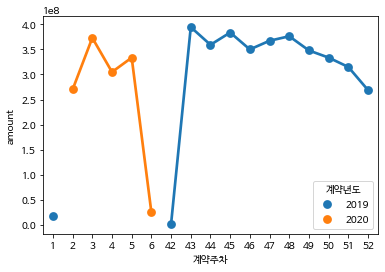

In [34]:
sns.pointplot(data = df1, x = '계약주차', y = 'amount', estimator=sum, hue = '계약년도')

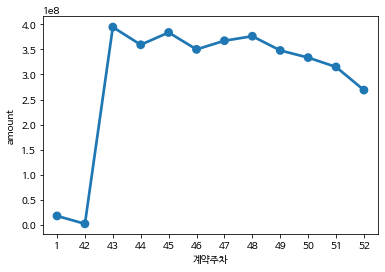

In [35]:
cond1 = df1['계약년도']==2019
df2 = df1.loc[cond1]
sns.pointplot(data = df2, x = '계약주차', y = 'amount', estimator=sum)

공정 : Control chart